
# 2.0 Authenticating with Twitter's API


In [ ]:
!pip install Twython

In [3]:
from twython import Twython, TwythonError


## 2.1 Enter app info and get auth URL


In [4]:
# open the keys file
my_file = open("keys.txt", "r")

# read the raw data
content = my_file.read()

# split all lines by  newline character
API_KEY, API_SECRET_KEY = content.split("\n")

# close the file
my_file.close()

In [5]:
twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

https://api.twitter.com/oauth/authenticate?oauth_token=axD5LgAAAAABTSFXAAABe-WlskE


In [6]:
# Replace the verifier with the pin number obtained with your web browser in the previous step
VERIFIER = '5363718'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)


## 2.3 Use authorized tokens


In [7]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

{'contributors_enabled': False,
 'created_at': 'Thu Aug 26 00:17:27 +0000 2010',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'volto em breve',
 'entities': {'description': {'urls': []}},
 'favourites_count': 5070,
 'follow_request_sent': False,
 'followers_count': 171,
 'following': False,
 'friends_count': 89,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 183031171,
 'id_str': '183031171',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 1,
 'location': '',
 'name': 'julia',
 'needs_phone_verification': False,
 'notifications': False,
 'profile_background_color': '34BFBF',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme16/bg.gif',
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/183031171/1602630101',
 'profile_image_url': 'http://

# 5.0 Creating social network graphs



In the remaining sections of this lesson, we're going to use NetworkX to create social networks from Twitter data. The examples are going to have users as nodes, so at a very basic level, we're going to do something like the following:

In [8]:
import networkx as nx

D = nx.DiGraph()

university = twitter.show_user(screen_name='riachuelo')
author = twitter.show_user(screen_name='mitchomezzomo')

D.add_edge(university['screen_name'], author['screen_name'], weight=1)

In [9]:
list(D.edges(data=True))

[('riachuelo', 'mitchomezzomo', {'weight': 1})]

# 6.0 Twitter retweet network



## 6.1 Get some tweets

In [11]:
import itertools

NUM_TWEETS_TO_FETCH = 15000

cursor01 = twitter.cursor(twitter.search, q='lojas riachuelo', count=100, result_type='mixed')
cursor02 = twitter.cursor(twitter.search, q='na riachuelo', count=100, result_type='mixed')
cursor03 = twitter.cursor(twitter.search, q='da riachuelo', count=100, result_type='mixed')
cursor04 = twitter.cursor(twitter.search, q=' riachu ', count=100, result_type='mixed')
somatorio = [*cursor01, *cursor02, *cursor03, *cursor04]
search_tweets = list(itertools.islice(somatorio, NUM_TWEETS_TO_FETCH))
len(search_tweets)

3511

## 6.2 Filter retweets


In [13]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

678

In [15]:
import pandas as pd

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}
for tweet in search_tweets:
    dict_['user'].append(tweet['user']['screen_name'])
    dict_['date'].append(tweet['created_at'])
    dict_['text'].append(tweet['text'])
    dict_['favorite_count'].append(tweet['favorite_count'])
# Structure data in a pandas DataFrame for easier manipulation
df = pd.DataFrame(dict_)

In [16]:
df.head()

,user,date,text,favorite_count
0,vemeconomizar,Tue Sep 14 18:05:55 +0000 2021,CUPOM DE DESCONTO ✨❤️\n\nShopee: CCAMI227\n\nA...,0
1,webmauster,Tue Sep 14 17:31:28 +0000 2021,Não conseguiu acompanhar a apresentação da Cap...,0
2,ReclameAQUI,Tue Sep 14 16:37:15 +0000 2021,@thefamouswho Opaaaaa! Chegueeeeeiiii! Corre l...,0
3,GuntherGuedes,Tue Sep 14 15:54:52 +0000 2021,As peças já estão nas lojas e também no site: ...,3
4,putsmel_,Tue Sep 14 15:42:52 +0000 2021,@eujuliovictor @sad_chl0e @Lojas_Renner @riach...,1


In [17]:
df.shape

(3511, 4)

In [22]:
df.to_csv("riachu.csv")

## 6.3 Create DiGraph


In [23]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

## 6.4 Analyze graph



### 6.4.1 Most retweeted user



Since the edges are in the direction of information flow, out-degree gives us the number of other users retweeting a given user. We can get the user with highest out-degree using the built-in `max` function:

In [24]:
max(D.nodes, key=D.out_degree)

'pavliique'

In [25]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]

[('pavliique', 114),
 ('Beccky23', 97),
 ('jungquerotti', 69),
 ('GlaucoS41843642', 45),
 ('riachuelo', 34)]

In [26]:
D.out_degree()

OutDegreeView({'riachuelo': 34, 'Glooaseul': 0, 'small_baechu': 0, 'GlaucoS41843642': 45, 'tizquadros': 0, 'InfoJobsVENDAS': 1, 'RecifeBot': 0, 'joanadarc2605': 0, 'josy_49': 0, 'paulacruz_clay': 0, 'osmarkss': 0, 'LaerciodeCastr4': 0, 'jucaramteixeira': 0, 'nathenes': 0, 'Sol07798202': 0, 'BaginiDe': 0, 'augusto7_cesar': 0, 'EraldoFrancisc2': 0, 'liamabat': 0, 'JoyceSanchotene': 0, 'jucaravlf': 0, 'PetucioS': 0, 'MarinesMoura': 0, 'vilmarvs60': 0, 'AmaralLula': 0, 'renanbnunes': 0, 'liubortuluzi': 0, 'ComunelloChris': 0, 'geraldoazevedof': 0, 'LhcLulalivre': 0, 'elis20715486': 0, 'jotahsilva': 0, 'MoyenneA': 0, 'ruiva08': 0, 'FogodoEon': 0, 'KrenRG': 0, 'JotaKar': 0, 'PFSilveira': 0, 'sonia_divinaa': 0, 'mil_jus': 0, '_PirLimPimPim_': 0, 'sandraffarias': 0, 'Torreslcbrasil': 0, 'joaomaringa': 0, 'Comedordefogo': 0, 'wpz13': 0, 'lilileite4': 0, 'wilsondenotari': 0, 'lauracleite': 0, 'joaovf08': 0, 'pcfl1897': 0, 'pavliique': 114, 'Fannyzinha_02': 0, 'deusacontent': 0, 'emygrx': 0, 'cla

In [27]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('pavliique', 114),
 ('Beccky23', 97),
 ('jungquerotti', 69),
 ('GlaucoS41843642', 45),
 ('riachuelo', 36)]


### 6.4.2 Anomaly detection


In [28]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('_riachu', 7),
 ('copinho_swiftie', 5),
 ('ranucacto', 5),
 ('Beccky23', 3),
 ('AnaPaul96065645', 3)]

### 6.4.3 Connectivity


In [29]:
nx.is_weakly_connected(D)

False

In [30]:
nx.number_weakly_connected_components(D)

94

### 6.4.4 Drawing


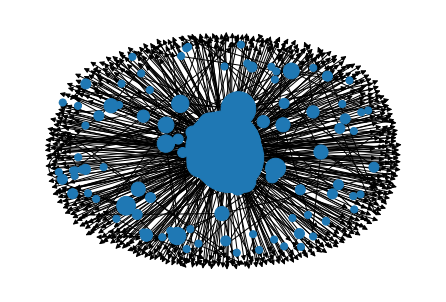

In [31]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "riachu_rtt.graphml")

Note that in this simplistic drawing, nodes with zero out-strength are not drawn on the diagram because their size is 0. This suits us fine; only the users who have been retweeted are drawn here.

# 7.0 Twitter mention network



## 7.1 Get some tweets

In [32]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='@riachuelo', count=100, result_type='mixed')

search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

960

In [ ]:
search_tweets[0]

In [34]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

## 7.3 Analyze graph



### 7.3.1 Most  popular users


In [35]:
max(D.nodes, key=D.in_degree)

'riachuelo'

In [36]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[('riachuelo', 656),
 ('Beccky23', 139),
 ('BT21_', 33),
 ('BTSxBRAZIL', 16),
 ('Aquariusdboyy', 15)]

In [37]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('riachuelo', 963),
 ('Beccky23', 158),
 ('BT21_', 45),
 ('Aquariusdboyy', 22),
 ('BTSxBRAZIL', 22)]


### 7.3.2 Conversation drivers


In [38]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[('Aquariusdboyy', 103),
 ('johnnyjpmendes', 72),
 ('Fefolety13', 32),
 ('JacoOmiguel', 27),
 ('yaponex', 27)]

### 7.3.3 Connectivity


In [39]:
nx.is_weakly_connected(D)

False

In [40]:
nx.number_weakly_connected_components(D)

4

### 7.3.4 Drawing


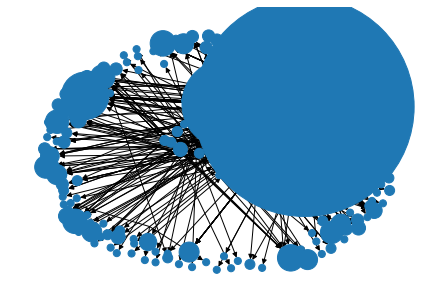

In [41]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)
nx.write_graphml(D, "riachu_men.graphml")